In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import binary_crossentropy
from keras.layers import Dense , Activation, Dropout , Flatten
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px


#read data

In [3]:
data = pd.read_csv("/content/housing_in_london_monthly_variables.csv")

In [4]:
data.sample(8)

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
4098,2009-12-01,haringey,288456,E09000014,231.0,1972.0,1
2674,2017-03-01,ealing,485942,E09000009,293.0,2435.0,1
8858,2005-05-01,tower hamlets,227543,E09000030,393.0,2448.0,1
6223,2011-06-01,kingston upon thames,306942,E09000021,215.0,907.0,1
4575,1999-07-01,havering,93171,E09000016,517.0,NaN,1
5573,2007-06-01,islington,390211,E09000019,347.0,2845.0,1
10643,2003-08-01,north east,84389,E12000001,5600.0,NaN,0
10683,2006-12-01,north east,134036,E12000001,6047.0,NaN,0


# Describe Data

In [5]:
data.shape

(13549, 7)

In [6]:
data.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
borough_flag     13549
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [8]:
data.dtypes


date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
borough_flag       int64
dtype: object

In [9]:
data.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,1.354900e+04,13455.000000,7439.000000,13549.000000
mean,2.635197e+05,3893.994129,2158.352063,0.733338
std,1.876175e+05,12114.402476,902.087742,0.442230
min,4.072200e+04,2.000000,0.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000,0.000000
50%,2.229190e+05,371.000000,2132.000000,1.000000
75%,3.368430e+05,3146.000000,2582.000000,1.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000


# Find Null Value And Deal With It

In [10]:
data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [11]:
# check NULL data
data_null = round(100 *(data.isna().sum()/data.shape[0]).sort_values(ascending = False) ,2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
no_of_crimes,45.10
houses_sold,0.69
date,0.00
area,0.00
average_price,0.00
code,0.00
borough_flag,0.00


<Axes: >

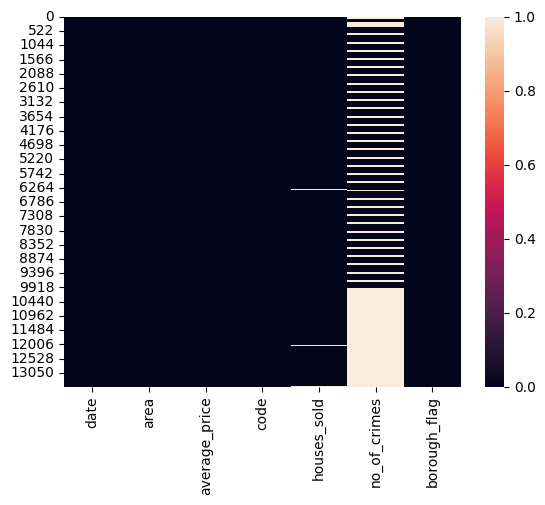

In [12]:
sns.heatmap(data.isnull())

In [13]:
data.duplicated().sum()

0

**Find Row With Null Value**

In [14]:
nan_no_of_crimes_rows = data[data['no_of_crimes'].isnull()]
nan_no_of_crimes_rows

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [15]:
nan_houses_sold_rows = data[data['houses_sold'].isnull()]
nan_houses_sold_rows

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
299,2019-12-01,city of london,734872,E09000001,NaN,NaN,1
300,2020-01-01,city of london,775309,E09000001,NaN,NaN,1
600,2019-12-01,barking and dagenham,301816,E09000002,NaN,1659.0,1
601,2020-01-01,barking and dagenham,301057,E09000002,NaN,1680.0,1
901,2019-12-01,barnet,517986,E09000003,NaN,2603.0,1
...,...,...,...,...,...,...,...
12946,2020-01-01,south east,320700,E12000008,NaN,NaN,0
13246,2019-12-01,south west,259011,E12000009,NaN,NaN,0
13247,2020-01-01,south west,254320,E12000009,NaN,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


**Deal With Null Value**

In [16]:
# #no_of_crimes column has NULL data almost 50%. We will remove this feature out. ❌❌❌
# #Drop no_of_crimes column we should
# data = data.drop(columns = ['no_of_crimes'])

In [17]:
# Remove the nan and fill with median
data['no_of_crimes']= data['no_of_crimes'].fillna(data['no_of_crimes'].median())
# Remove the nan and fill with values
data['houses_sold']= data['houses_sold'].fillna(data['houses_sold'].median())


In [18]:
data.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

In [19]:
data.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13549
no_of_crimes     13549
borough_flag     13549
dtype: int64

**Turn date type from object to date format**

In [20]:
data.date=pd.to_datetime(data.date)

In [21]:
data.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
borough_flag              int64
dtype: object

**add new 3 col contain year month day from date col**

In [22]:
data.insert(1,'year',data.date.dt.year) #to insert it in second col
data.insert(2,'month',data.date.dt.month) #to insert it in second col
#data.insert(3,'day',data.date.dt.day) #to insert it in second col
#data['year']=data.date.dt.year          #to insert it in last col
#data.drop(['year'], axis=1)             #to delete year col

In [23]:
data.head(5)

,date,year,month,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,1995,1,city of london,91449,E09000001,17.0,2132.0,1
1,1995-02-01,1995,2,city of london,82203,E09000001,7.0,2132.0,1
2,1995-03-01,1995,3,city of london,79121,E09000001,14.0,2132.0,1
3,1995-04-01,1995,4,city of london,77101,E09000001,7.0,2132.0,1
4,1995-05-01,1995,5,city of london,84409,E09000001,10.0,2132.0,1


# Analysis Dara

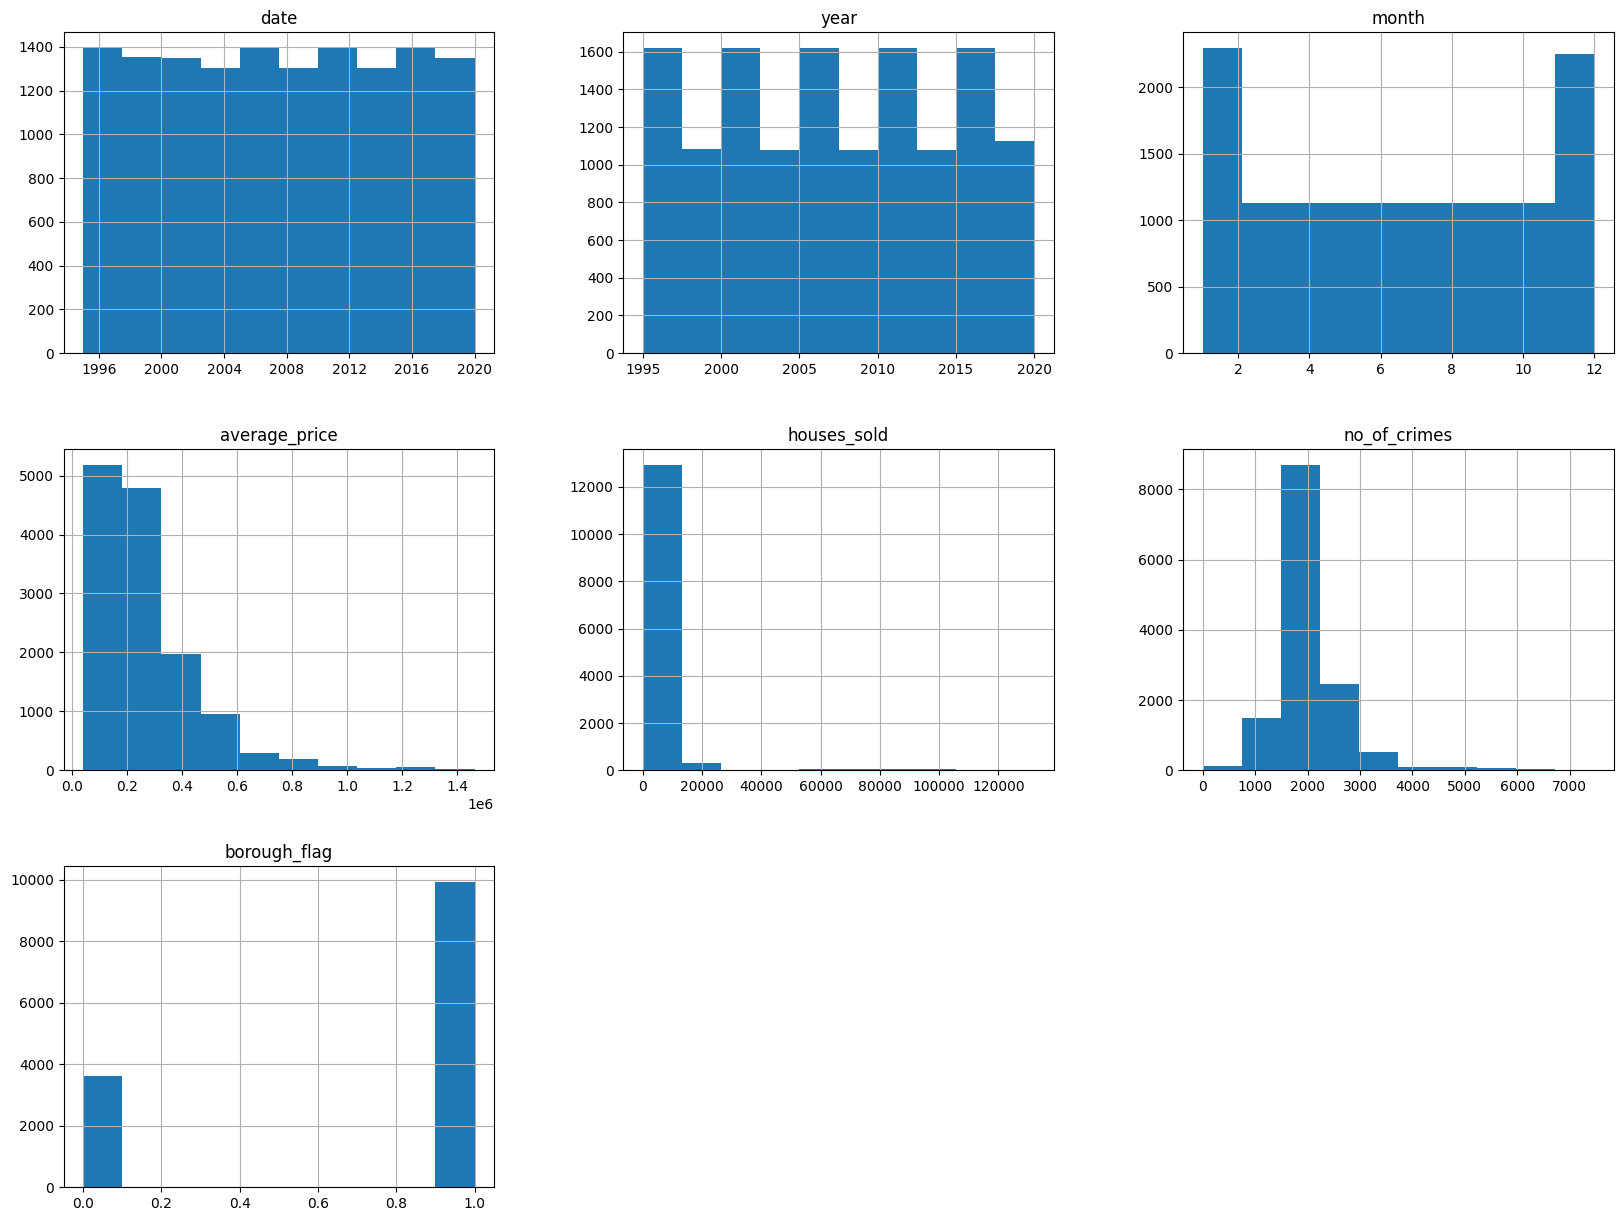

In [24]:
data.hist(figsize=(20,15))
plt.show()

<ipython-input-25-19861a2170cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

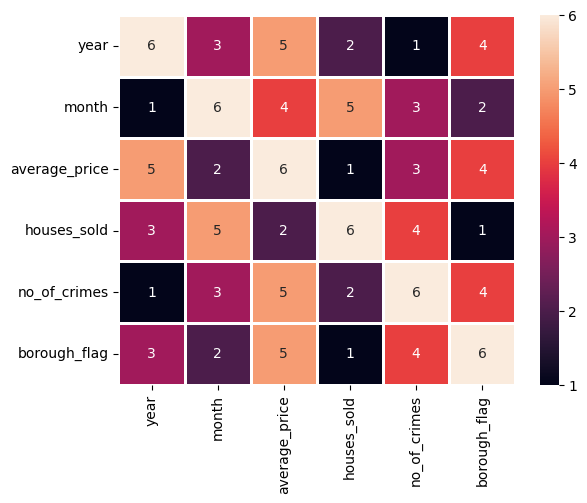

In [25]:
corr = data.corr()
sns.heatmap(corr.rank(axis="columns") , annot=True , linewidths=0.8 )

**Show all the records where number of crimes is zero and how many such records are there**

In [26]:
data[data.no_of_crimes==0]

,date,year,month,area,average_price,code,houses_sold,no_of_crimes,borough_flag
72,2001-01-01,2001,1,city of london,284262,E09000001,24.0,0.0,1
73,2001-02-01,2001,2,city of london,198137,E09000001,37.0,0.0,1
74,2001-03-01,2001,3,city of london,189033,E09000001,44.0,0.0,1
75,2001-04-01,2001,4,city of london,205494,E09000001,38.0,0.0,1
76,2001-05-01,2001,5,city of london,223459,E09000001,30.0,0.0,1
...,...,...,...,...,...,...,...,...,...
178,2009-11-01,2009,11,city of london,397909,E09000001,11.0,0.0,1
179,2009-12-01,2009,12,city of london,411955,E09000001,16.0,0.0,1
180,2010-01-01,2010,1,city of london,464436,E09000001,20.0,0.0,1
181,2010-02-01,2010,2,city of london,490525,E09000001,9.0,0.0,1


In [27]:
len(data[data.no_of_crimes==0])

104

**What is the maximum and minimum average price per year in England**

In [28]:
england_avg_price=data[data.area=='england']

In [29]:
england_avg_price[['year','average_price','area']]

,year,average_price,area
13248,1995,53203,england
13249,1995,53096,england
13250,1995,53201,england
13251,1995,53591,england
13252,1995,53678,england
...,...,...,...
13544,2019,249942,england
13545,2019,249376,england
13546,2019,248515,england
13547,2019,250410,england


In [30]:
round(england_avg_price.groupby('year').average_price.mean(),2).to_frame()

,average_price
year,
1995,53322.42
1996,54151.50
1997,59160.67
1998,64301.67
1999,70070.75
2000,80814.33
2001,90306.75
2002,107981.50
2003,130218.58


In [31]:
england_avg_price.groupby('year').average_price.max().to_frame()

,average_price
year,
1995,53901
1996,55755
1997,61564
1998,65743
1999,75071
2000,84191
2001,95992
2002,119982
2003,138985


In [32]:
england_avg_price.groupby('year').average_price.min().to_frame()

,average_price
year,
1995,52788
1996,52333
1997,55789
1998,61659
1999,65522
2000,75219
2001,84245
2002,96215
2003,121610


**Maximum number of crimes recorded per area**

In [33]:
data.groupby('area').no_of_crimes.max().to_frame()

,no_of_crimes
area,
barking and dagenham,2132.0
barnet,2893.0
bexley,2132.0
brent,2937.0
bromley,2637.0
camden,4558.0
city of london,2132.0
croydon,3263.0
ealing,3401.0


**Show the total count of records of each area, where average price is less then 100000**

In [34]:
data[data.average_price<100000].area.value_counts().to_frame()

,area
north east,112
north west,111
yorks and the humber,110
east midlands,96
west midlands,94
england,87
barking and dagenham,85
south west,78
east of england,76
newham,72


**check number of boroughs in dataset && What are 33 London boroughs ?**


In [35]:
# Use DataFrame.loc[] to filter by multiple conditions
# get all data['borough_flag']==1 and show from data only two col ['area','borough_flag']

London_Brought = data.loc[(data['borough_flag']==1),['area','borough_flag']]
London_Brought

,area,borough_flag
0,city of london,1
1,city of london,1
2,city of london,1
3,city of london,1
4,city of london,1
...,...,...
9933,westminster,1
9934,westminster,1
9935,westminster,1
9936,westminster,1


In [36]:
London_Brought = pd.DataFrame(London_Brought['area'].unique() , columns=['London Brought'])
London_Brought

,London Brought
0,city of london
1,barking and dagenham
2,barnet
3,bexley
4,brent
5,bromley
6,camden
7,croydon
8,ealing
9,enfield


# Visualization

In [37]:
df_boroughs = data[data['borough_flag'] == 1]
df_boroughs

,date,year,month,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,1995,1,city of london,91449,E09000001,17.0,2132.0,1
1,1995-02-01,1995,2,city of london,82203,E09000001,7.0,2132.0,1
2,1995-03-01,1995,3,city of london,79121,E09000001,14.0,2132.0,1
3,1995-04-01,1995,4,city of london,77101,E09000001,7.0,2132.0,1
4,1995-05-01,1995,5,city of london,84409,E09000001,10.0,2132.0,1
...,...,...,...,...,...,...,...,...,...
9933,2019-09-01,2019,9,westminster,925955,E09000033,169.0,6384.0,1
9934,2019-10-01,2019,10,westminster,927864,E09000033,168.0,7208.0,1
9935,2019-11-01,2019,11,westminster,955615,E09000033,150.0,6843.0,1
9936,2019-12-01,2019,12,westminster,968404,E09000033,371.0,7461.0,1


In [38]:
df_boroughs_mean = round(df_boroughs.groupby('area').average_price.mean(),2).sort_values().to_frame().reset_index()
df_boroughs_mean

,area,average_price
0,barking and dagenham,159852.93
1,bexley,189570.74
2,newham,195646.07
3,havering,205026.66
4,croydon,209349.67
5,greenwich,213056.47
6,lewisham,216601.89
7,sutton,217273.45
8,waltham forest,220395.16
9,enfield,223130.63


In [39]:
# 1- find all row which borough_flag == 1
# 2- take each area and find all price for it and take mean then round to 2 then sort asc then turn to frame then add index column
df_boroughs = data[data['borough_flag'] == 1]
df_boroughs_mean = round(df_boroughs.groupby('area').average_price.mean(),2).sort_values().to_frame().reset_index()

In [40]:
fig = px.bar(df_boroughs_mean, x="average_price", y="area",template = 'simple_white', title ='Which borough area is the most expensive ?')
fig.show()

In [41]:
# 1- find all row which borough_flag == 1
# 2- take each area and find all price for it and take mean then round to 2 then sort asc then turn to frame then add index column
df_boroughs = data[data['borough_flag'] == 1]
df_boroughs_sum = round(df_boroughs.groupby('area').houses_sold.sum(),2).sort_values().to_frame().reset_index()

In [42]:
fig = px.bar(df_boroughs_sum, x="houses_sold", y="area",
             template = 'simple_white', title ='Which borough area is the most expensive ?')
fig.show()

In [43]:
#color here is like group by
#plot average_price when borough_flag is one then plot average_price when borough_flag is two
fig = px.box(data, x="average_price", template = 'simple_white', title ='Average house price (1995 - 2020)',color= 'borough_flag')
fig.show()

In [44]:
fig = px.histogram(data, x="average_price", y="houses_sold", template = 'simple_white',
              title ='Total houses sold (1995 - 2020)',color= 'borough_flag', nbins = 20)
#fig.update_traces(opacity=0.15) #opacity of figure
fig.show()

In [45]:
data.groupby(['date','borough_flag']).average_price.mean().to_frame()

average_price
date       borough_flag               
1995-01-01 0              56598.833333
           1              81906.424242
1995-02-01 0              56315.166667
           1              81527.969697
1995-03-01 0              56425.333333
...                                ...
2019-11-01 1             522975.878788
2019-12-01 0             289162.666667
           1             524032.787879
2020-01-01 0             286998.833333
           1             527450.393939

[602 rows x 1 columns]

In [46]:
df_date_price = data.groupby(['date','borough_flag']).average_price.mean().to_frame().reset_index()

In [47]:
fig = px.line(df_date_price, x='date', y= 'average_price' , template = 'simple_white',
              title ='The change of house prices over 25 years',color = 'borough_flag')
fig.show()